In [10]:
# Set up stlab
from pyplr import stlab
d = stlab.SpectraTuneLab(password='2294b16eea08a15a')
d.turn_off()

LIGHT HUB login success
User authenticated as: admin
The following addresses are defined: [1, 1004, 1023]
Call get_luminaires() / get_device_info() for more info


<Response [200]>

In [11]:
from time import sleep
from pyplr.pupil import PupilCore

p = PupilCore()

p.command('R our_recording')

sleep(1)

p.command('r')

'OK'

In [12]:
p.check_3d_model()

> Refit the 3d model? [y/n]:  y


> Unfreezing 3d model for eye 0
> Unfreezing 3d model for eye 1
> Ask the participant to roll their eyes


> Press "Enter" when ready to freeze the model:  


> Freezing 3d model for eye 0
> Freezing 3d model for eye 1


In [13]:
p = PupilCore()
pgr_future = p.pupil_grabber(topic='pupil.0.3d', seconds=5) # can change to 0 or 1 depending on eye

> Grabbing 5 seconds of pupil.0.3d
> PupilGrabber done grabbing 5 seconds of pupil.0.3d


In [14]:
data = pgr_future.result()
data[0]

{'id': 0,
 'topic': 'pupil.0.3d',
 'method': 'pye3d 0.3.0 real-time',
 'norm_pos': [0.2847938870503808, 0.36237715939270887],
 'diameter': 64.73415671445504,
 'confidence': 0.9123483896255493,
 'timestamp': 111137.441361,
 'sphere': {'center': [1.8648498195920717,
   1.6973079362469186,
   41.00428694314772],
  'radius': 10.392304845413264},
 'projected_sphere': {'center': [108.7278934773559, 107.63727850639084],
  'axes': [171.8116313730195, 171.8116313730195],
  'angle': 0.0},
 'circle_3d': {'center': [-4.363039540943644,
   2.9329684597285324,
   32.77710412132863],
  'normal': [-0.599278933131417, 0.11890148930985057, -0.7916610361415862],
  'radius': 3.3301963789374405},
 'diameter_3d': 6.660392757874881,
 'ellipse': {'center': [54.68042631367311, 122.42358539659989],
  'axes': [49.35026465968522, 64.73415671445504],
  'angle': 166.05073132023267},
 'location': [54.68042631367311, 122.42358539659989],
 'model_confidence': 1.0,
 'theta': 1.4516128770650742,
 'phi': -2.2187556010480

Text(0.5, 0, 'Pupil timestamp (s)')

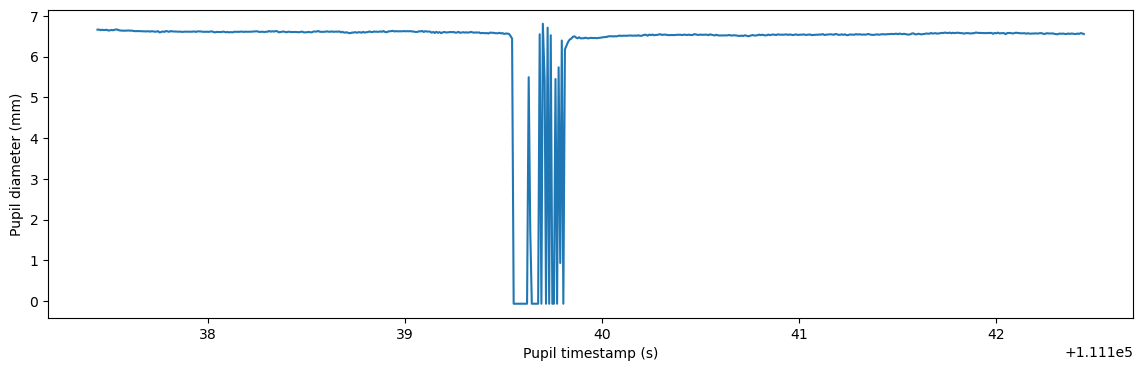

In [15]:
import matplotlib.pyplot as plt
from pyplr.utils import unpack_data_pandas

data = unpack_data_pandas(data, cols=['timestamp','diameter_3d'])
ax = data['diameter_3d'].plot(figsize=(14,4))
ax.set_ylabel('Pupil diameter (mm)')
ax.set_xlabel('Pupil timestamp (s)')